# Recommend by Clustering

In [1]:
# %load_ext autoreload
# %autoreload 2

import pickle 
import pandas as pd
import numpy as np

from sklearn.neighbors import NearestNeighbors

from visuals import view_nn_images
%matplotlib inline

## Clothing Nearest Neighbors

In [2]:
clothing_df = pd.read_pickle('saved_models/dense_clothing_df.pickle')
print(clothing_df.shape)
clothing_df.head()

(3147, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
../data/clothing2/train/black_skinny_jeans/black_skinny_jeans57.jpg,-0.000000,-0.000000,-0.000000,0.852902,-0.000000,-0.000000,-0.0,0.774002,1.528834,-0.0,...,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.0,0.500662,0.376247,-0.000000
../data/clothing2/train/white_short_dresses/white_short_dresses205.jpg,-0.000000,0.872361,-0.000000,0.827627,0.686359,0.707280,-0.0,0.940041,0.983559,-0.0,...,-0.0,-0.0,-0.0,0.539217,0.394101,-0.0,-0.0,-0.000000,0.412421,-0.000000
../data/clothing2/train/skinny_blue_jeans/skinny_blue_jeans111.jpg,-0.000000,-0.000000,-0.000000,-0.000000,0.910299,1.145305,-0.0,0.398481,-0.000000,-0.0,...,-0.0,-0.0,-0.0,0.960778,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000
../data/clothing2/train/royal_blue_short_dresses/royal_blue_short_dresses26.jpg,-0.000000,-0.000000,1.968974,-0.000000,0.424211,0.918774,-0.0,-0.000000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,1.146311,-0.000000,-0.0,-0.0,-0.000000,-0.000000,1.276475
../data/clothing2/train/running_shorts/running_shorts260.jpg,0.569021,0.359611,0.183146,-0.000000,1.037584,0.171459,-0.0,-0.000000,0.043893,-0.0,...,-0.0,-0.0,-0.0,0.465505,-0.000000,-0.0,-0.0,-0.000000,-0.000000,0.382149


In [6]:
# find K-Nearest Neighbors 
# knn_top = NearestNeighbors(n_neighbors=4, metric='cosine').fit(df)
knn_top = NearestNeighbors(n_neighbors=4, metric='euclidean').fit(clothing_df)
distances, indices = knn_top.kneighbors(clothing_df)

# create a dataframe of indices of nearest neighbors
knn_df = pd.DataFrame(np.array(clothing_df.index[indices]))
print(knn_df.shape)
knn_df.head()

(3147, 4)


,0,1,2,3
0,../data/clothing2/train/black_skinny_jeans/bla...,../data/clothing2/train/black_skinny_jeans/bla...,../data/clothing2/validate/black_skinny_jeans/...,../data/clothing2/validate/black_skinny_jeans/...
1,../data/clothing2/train/white_short_dresses/wh...,../data/clothing2/train/white_short_dresses/wh...,../data/clothing2/train/white_short_dresses/wh...,../data/clothing2/train/white_short_dresses/wh...
2,../data/clothing2/train/skinny_blue_jeans/skin...,../data/clothing2/train/skinny_blue_jeans/skin...,../data/clothing2/train/skinny_blue_jeans/skin...,../data/clothing2/train/skinny_blue_jeans/skin...
3,../data/clothing2/train/royal_blue_short_dress...,../data/clothing2/train/royal_blue_short_dress...,../data/clothing2/train/royal_blue_short_dress...,../data/clothing2/train/royal_blue_short_dress...
4,../data/clothing2/train/running_shorts/running...,../data/clothing2/train/running_shorts/running...,../data/clothing2/train/running_shorts/running...,../data/clothing2/test/running_shorts/running_...


Index: 3072


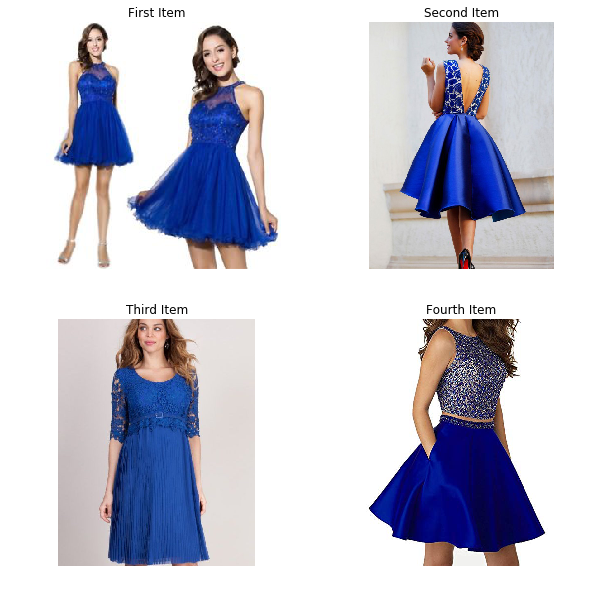

In [21]:
import random
rand_num = random.sample(list(range(knn_df.shape[0])),1)[0]
print(f'Index: {rand_num}')
view_nn_images(knn_df, 1318)

In [ ]:
# what???
# 1432 (left bent elbow???)


# almost
# 2877


# good
# 260
# 1556
# 1815
# 1764
# 1189
# 1942
# 279
# 1244
# 1905

# 2335
# 1318
# 615
# 1567
# 639
# 1111

## Shoe Nearest Neighbors

In [22]:
shoe_df = pd.read_pickle('saved_models/dense_shoe_df.pickle')
print(shoe_df.shape)
shoe_df.head()

(24674, 150)


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
../data/shoes/train/heels/8043038.316039.jpg,-0.0,-0.000000,-0.000000,-0.000000,0.623390,2.524577,-0.0,-0.0,-0.000000,-0.0,...,0.044441,-0.000000,-0.0,0.007148,-0.0,0.823984,0.51745,0.887040,2.022019,-0.000000
../data/shoes/train/heels/8083287.632.jpg,-0.0,1.004132,-0.000000,-0.000000,2.914217,1.972810,-0.0,-0.0,-0.000000,-0.0,...,-0.000000,1.379579,-0.0,2.108707,-0.0,-0.000000,-0.00000,1.453297,0.977426,-0.000000
../data/shoes/train/sandals/8078932.93554.jpg,-0.0,2.433344,-0.000000,-0.000000,3.276672,2.675798,-0.0,-0.0,-0.000000,-0.0,...,0.456098,-0.000000,-0.0,2.718879,-0.0,-0.000000,-0.00000,0.731049,0.324867,-0.000000
../data/shoes/train/athletic/7648281.366976.jpg,-0.0,-0.000000,0.565378,0.484051,1.656650,3.466596,-0.0,-0.0,0.957614,-0.0,...,1.389993,-0.000000,-0.0,0.212276,-0.0,0.086965,-0.00000,-0.000000,0.957823,-0.000000
../data/shoes/train/calf_boots/7697146.3008.jpg,-0.0,-0.000000,-0.000000,-0.000000,1.476679,1.689637,-0.0,-0.0,-0.000000,-0.0,...,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.00000,0.317774,1.782560,1.406268


In [40]:
# find K-Nearest Neighbors 
knn_top_shoe = NearestNeighbors(n_neighbors=4, metric='cosine').fit(shoe_df)
# knn_top_shoe = NearestNeighbors(n_neighbors=4, metric='euclidean').fit(shoe_df)
distances_shoe, indices_shoe = knn_top_shoe.kneighbors(shoe_df)

# create a dataframe of indices of nearest neighbors
knn_df_shoe = pd.DataFrame(np.array(shoe_df.index[indices_shoe]))
print(knn_df_shoe.shape)
knn_df_shoe.head()

(24674, 4)


,0,1,2,3
0,../data/shoes/train/heels/8043038.316039.jpg,../data/shoes/validate/ankle_boots/8007518.365...,../data/shoes/train/ankle_boots/7991470.72.jpg,../data/shoes/train/ankle_boots/8004842.365273...
1,../data/shoes/train/heels/8083287.632.jpg,../data/shoes/validate/heels/8093420.321317.jpg,../data/shoes/train/sandals/7953239.346505.jpg,../data/shoes/train/sandals/8072064.3.jpg
2,../data/shoes/train/sandals/8078932.93554.jpg,../data/shoes/train/sandals/8078932.3.jpg,../data/shoes/validate/sandals/8132517.552.jpg,../data/shoes/test/sandals/7925871.8618.jpg
3,../data/shoes/train/athletic/7648281.366976.jpg,../data/shoes/train/athletic/7507523.29320.jpg,../data/shoes/train/athletic/7814660.357823.jpg,../data/shoes/validate/athletic/7948154.344809...
4,../data/shoes/train/calf_boots/7697146.3008.jpg,../data/shoes/train/ankle_boots/7993780.328.jpg,../data/shoes/train/calf_boots/7278063.89.jpg,../data/shoes/train/ankle_boots/7983636.3.jpg


Index: 13237


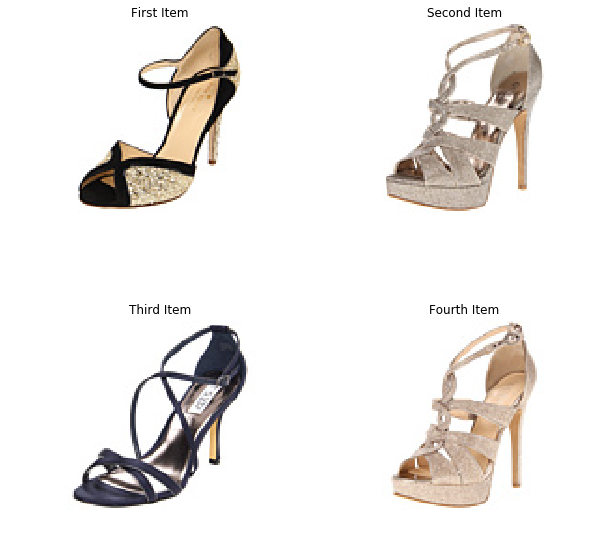

In [118]:
rand_num = random.sample(list(range(knn_df_shoe.shape[0])),1)[0]
print(f'Index: {rand_num}')
view_nn_images(knn_df_shoe, 1517)

In [52]:
# What???
# 15159
# 21240
# 24360
# 2628
# 20422

# Almost  always the second one is off??
# 1070
# 19572
# 5544
# 4906
# 19593
# 18568
# 9906
# 24183
# 5437
# 1732

# Good
# 22592
# 12239
# 11833
# 24306
# 15657
# 2074
# 2419
# 7761
# 18025
# 16909

# 780
# 24279